In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib
#matplotlib.use('Agg')


In [4]:
if __name__ == "__main__":
    # Detect running outside of snakemake and mock snakemake for testing
    if 'snakemake' not in globals():
        from _helpers import mock_snakemake
        snakemake = mock_snakemake('plot_summary', palette='p1', zone='IE', year='2025', participation='10')   

ERROR 1: PROJ: proj_create_from_database: Open of /home/iegor/miniconda3/envs/247-new/share/proj failed


In [5]:
df = pd.read_csv(snakemake.input.summary, index_col=0)

In [6]:
df

,ref,cfe80,cfe85,cfe90,cfe95,cfe98,cfe99,cfe100
ci_average cost,81.046317,70.452148,75.378998,82.514603,95.659753,125.705253,150.992309,248.184575
ci_average_revenue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ci_cap_battery_charger,0.000000,62.160050,128.207968,199.799183,283.785108,297.053581,432.068768,215.555261
ci_cap_battery_discharger,0.000000,63.441829,130.851695,203.919166,289.636933,303.179010,440.978293,220.000144
ci_cap_onwind,0.000000,424.763196,429.899656,417.352526,446.787571,777.387833,877.325502,2108.191642
...,...,...,...,...,...,...,...,...
system_inv_offwind-dc-2025,34723.654135,34722.963409,34722.620377,34722.580627,34722.587596,34722.593688,34722.625354,34722.662426
system_inv_onwind-2025,114401.756879,114365.770552,114365.502773,114365.801895,114365.906302,114365.847327,114365.638390,114365.705916
system_inv_solar-2025,189014.237066,189017.003956,189017.549975,189017.060619,189016.795720,189016.989496,189017.232056,189017.082172
system_inv_solar_rooftop-2025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
# Specify the base path and desired size and palette
scenario = '-noexcess'
desired_size = '10'
desired_palette = 'p3'

In [42]:
def carbon_drop(scenario):
    base_path = f'../results/paper{scenario}/csvs'
    aggregated_df = pd.DataFrame()

    # Loop through the directory structure
    for root, dirs, files in os.walk(base_path):
        components = root.split(os.sep)
        # print(components)  # for debugging

        # Pickup desired participation and palette
        if len(components) == 8 and components[4] == desired_size and components[7] == desired_palette:
            year, zone = components[5], components[6]

            if 'summary.csv' in files:
                file_path = os.path.join(root, 'summary.csv')
                df = pd.read_csv(file_path, index_col=0)

                emissions_zone_data = df.loc['emissions_zone']
                emissions_zone_data.name = (zone, year)

                if aggregated_df.empty:
                    aggregated_df = pd.DataFrame(columns=emissions_zone_data.index, dtype=float)

                aggregated_df = pd.concat([aggregated_df, emissions_zone_data.to_frame().T], ignore_index=False)

    aggregated_df.index.names = ['system']
    aggregated_df = aggregated_df[['ref','cfe100']]
    aggregated_df[f'diff{scenario}'] = aggregated_df['ref'] - aggregated_df['cfe100']
    aggregated_df.rename(columns={'cfe100': f'cfe100{scenario}'}, inplace=True)
    return aggregated_df


In [43]:
carbon_drop(scenario='-noexcess')

,ref,cfe100-noexcess,diff-noexcess
system,,,
"(IE, 2025)",4.167989,3.683084,0.484905
"(DK, 2025)",5.359199,5.275739,0.083459
"(DE, 2025)",118.813364,106.168332,12.645032
"(PL, 2025)",83.789216,78.850120,4.939096
"(IE, 2030)",2.497402,2.224328,0.273073
"(DK, 2030)",0.923071,0.914228,0.008843
"(DE, 2030)",50.388563,44.896741,5.491821
"(PL, 2030)",15.587369,13.269711,2.317659


In [44]:
carbon_drop(scenario='')

,ref,cfe100,diff
system,,,
"(IE, 2025)",4.183077,3.661262,0.521815
"(DK, 2025)",5.392710,5.273303,0.119407
"(DE, 2025)",118.818693,104.017563,14.801130
"(PL, 2025)",83.806491,77.952538,5.853953
"(IE, 2030)",2.483835,2.113436,0.370399
"(DK, 2030)",0.922003,0.907443,0.014560
"(DE, 2030)",50.381881,44.488444,5.893436
"(PL, 2030)",15.513216,12.921741,2.591475


In [45]:
df1 = carbon_drop(scenario='')
df2 = carbon_drop(scenario='-noexcess')
data = df1.copy()

for col in df2.columns:
    if col not in df1.columns:
        data[col] = df2[col]

In [46]:
data

,ref,cfe100,diff,cfe100-noexcess,diff-noexcess
system,,,,,
"(IE, 2025)",4.183077,3.661262,0.521815,3.683084,0.484905
"(DK, 2025)",5.392710,5.273303,0.119407,5.275739,0.083459
"(DE, 2025)",118.818693,104.017563,14.801130,106.168332,12.645032
"(PL, 2025)",83.806491,77.952538,5.853953,78.850120,4.939096
"(IE, 2030)",2.483835,2.113436,0.370399,2.224328,0.273073
"(DK, 2030)",0.922003,0.907443,0.014560,0.914228,0.008843
"(DE, 2030)",50.381881,44.488444,5.893436,44.896741,5.491821
"(PL, 2030)",15.513216,12.921741,2.591475,13.269711,2.317659


In [47]:
rename_scen = {
    'ref': 'no procuremnt',
    'cfe100':'100% 24/7 CFE',
    'diff': 'Emissions reduction total',
    'cfe100-noexcess': '100% 24/7 CFE w/o excess',
    'diff-noexcess': 'Profile effect'
        }

data.rename(columns=rename_scen, inplace=True)

In [55]:
data

,no procuremnt,100% 24/7 CFE,Emissions reduction total,100% 24/7 CFE w/o excess,Profile effect,Volume effect
system,,,,,,
"(IE, 2025)",4.183077,3.661262,0.521815,3.683084,0.484905,0.036911
"(DK, 2025)",5.392710,5.273303,0.119407,5.275739,0.083459,0.035948
"(DE, 2025)",118.818693,104.017563,14.801130,106.168332,12.645032,2.156098
"(PL, 2025)",83.806491,77.952538,5.853953,78.850120,4.939096,0.914858
"(IE, 2030)",2.483835,2.113436,0.370399,2.224328,0.273073,0.097325
"(DK, 2030)",0.922003,0.907443,0.014560,0.914228,0.008843,0.005717
"(DE, 2030)",50.381881,44.488444,5.893436,44.896741,5.491821,0.401615
"(PL, 2030)",15.513216,12.921741,2.591475,13.269711,2.317659,0.273817


In [49]:
data['Volume effect'] = data['Emissions reduction total'] - data['Profile effect']

In [50]:
data

,no procuremnt,100% 24/7 CFE,Emissions reduction total,100% 24/7 CFE w/o excess,Profile effect,Volume effect
system,,,,,,
"(IE, 2025)",4.183077,3.661262,0.521815,3.683084,0.484905,0.036911
"(DK, 2025)",5.392710,5.273303,0.119407,5.275739,0.083459,0.035948
"(DE, 2025)",118.818693,104.017563,14.801130,106.168332,12.645032,2.156098
"(PL, 2025)",83.806491,77.952538,5.853953,78.850120,4.939096,0.914858
"(IE, 2030)",2.483835,2.113436,0.370399,2.224328,0.273073,0.097325
"(DK, 2030)",0.922003,0.907443,0.014560,0.914228,0.008843,0.005717
"(DE, 2030)",50.381881,44.488444,5.893436,44.896741,5.491821,0.401615
"(PL, 2030)",15.513216,12.921741,2.591475,13.269711,2.317659,0.273817


In [51]:
fractions = pd.DataFrame()
fractions['Profile effect share'] = (data['Profile effect'] / data['Emissions reduction total']) * 100
fractions['Volume effect share'] = (data['Volume effect'] / data['Emissions reduction total']) * 100
fractions

,Profile effect share,Volume effect share
system,,
"(IE, 2025)",92.926505,7.073495
"(DK, 2025)",69.894885,30.105115
"(DE, 2025)",85.432882,14.567118
"(PL, 2025)",84.371970,15.628030
"(IE, 2030)",73.724162,26.275838
"(DK, 2030)",60.734596,39.265404
"(DE, 2030)",93.185385,6.814615
"(PL, 2030)",89.433937,10.566063


In [52]:
abs = pd.DataFrame()
abs['Profile effect'] = data['Profile effect']
abs['Volume effect'] = data['Volume effect']
abs

,Profile effect,Volume effect
system,,
"(IE, 2025)",0.484905,0.036911
"(DK, 2025)",0.083459,0.035948
"(DE, 2025)",12.645032,2.156098
"(PL, 2025)",4.939096,0.914858
"(IE, 2030)",0.273073,0.097325
"(DK, 2030)",0.008843,0.005717
"(DE, 2030)",5.491821,0.401615
"(PL, 2030)",2.317659,0.273817


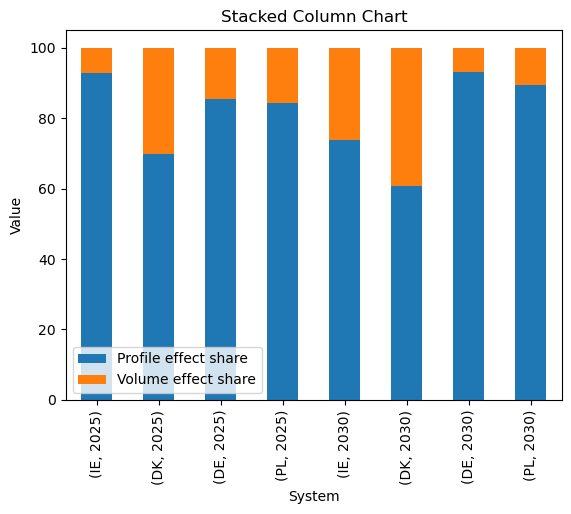

In [53]:
df = pd.DataFrame(fractions)

# Create a stacked column chart
ax = df.plot(kind='bar', stacked=True)

# Customize the plot
ax.set_xlabel('System')
ax.set_ylabel('Value')
ax.set_title('Stacked Column Chart')

# Display the plot
plt.show()

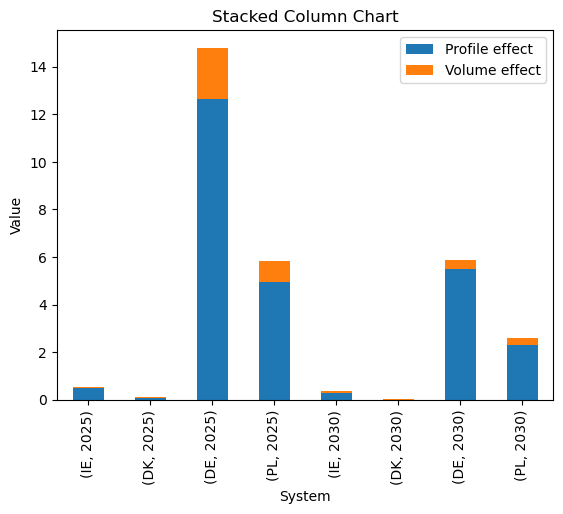

In [54]:
df = pd.DataFrame(abs)

# Create a stacked column chart
ax = df.plot(kind='bar', stacked=False)

# Customize the plot
ax.set_xlabel('System')
ax.set_ylabel('Value')
ax.set_title('Stacked Column Chart')

# Display the plot
plt.show()